## Imports

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import sys
sys.path.append('/Users/tudorlapusan/Documents/workspaces/ml/DecisionTreeStructure/')

In [3]:
import numpy as np
from random import randint
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import graphviz
from graphviz import Source

from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from tree.decision_tree_structure import DecisionTreeStructure


## Util functions

In [4]:
def print_scores(model, train, valid, features, target):
    """Print metrics specific to this dataset
    """
    
    prediction_train = model.predict(train[features])
    prediction_valid = model.predict(valid[features])
    print(f"train accuracy {accuracy_score(train[target], prediction_train)}")
    print(f"valid accuracy {accuracy_score(valid[target], prediction_valid)}")
    
def save_decision_tree_structure(model_param, filename_param, features_param):
    graph = Source(sklearn.tree.export_graphviz(model_param, feature_names=features_param, class_names=["0", "1"],
                                                filled=True, node_ids=True))
    graph.format = 'png'
    graph.render(filename=filename_param,view=True)
    

## Data load - [titanic dataset](https://www.kaggle.com/c/titanic/data)

In [6]:
dataset = pd.read_csv("../data/train_titanic.csv")

In [7]:
dataset.shape

(891, 12)

In [8]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## EDA

In [7]:
dataset.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [8]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data transformation

#TODO To avoid any kind of data leakage, make these tranformations only on training dataset and apply them on validation 

In [17]:
# Age
dataset["Age_na"] = dataset["Age"].isna().astype(int)
dataset.fillna({"Age":dataset.median()["Age"]}, inplace=True)

#Sex
dataset["Sex_label"] = dataset["Sex"].astype("category").cat.codes

#Cabin
dataset["Cabin_label"] = dataset["Cabin"].astype("category").cat.codes

# Embarked
dataset["Embarked_label"] = dataset["Embarked"].astype("category").cat.codes

## Select features and target variables


In [18]:
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"

## Train/validation split

In [19]:
random_state = 1987
train, valid = train_test_split(dataset, test_size = 0.2, stratify = dataset.Survived, random_state=random_state)

## Decision tree structure visualizations

### Before starting we must understand :
    - what is a decision tree ?
    - what is a split/leaf node ?
    - understand node information

In [25]:
max_depth = 3

In [26]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, random_state=random_state)
_ = model.fit(train[features], train[target])

In [27]:
save_decision_tree_structure(model, f"dtree_rander_{max_depth}", features)

### Default values

In [29]:
model = DecisionTreeClassifier(criterion="entropy", random_state=random_state)
model.fit(train[features], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1987,
            splitter='best')

#### Model scores

In [32]:
print_scores(model, train, valid, features, target)

train accuracy 0.9873595505617978
valid accuracy 0.770949720670391


In [34]:
save_decision_tree_structure(model, f"dtree_rander_none", features)

#### Init decision tree structure

In [35]:
dts = DecisionTreeStructure(model, train, features, target)

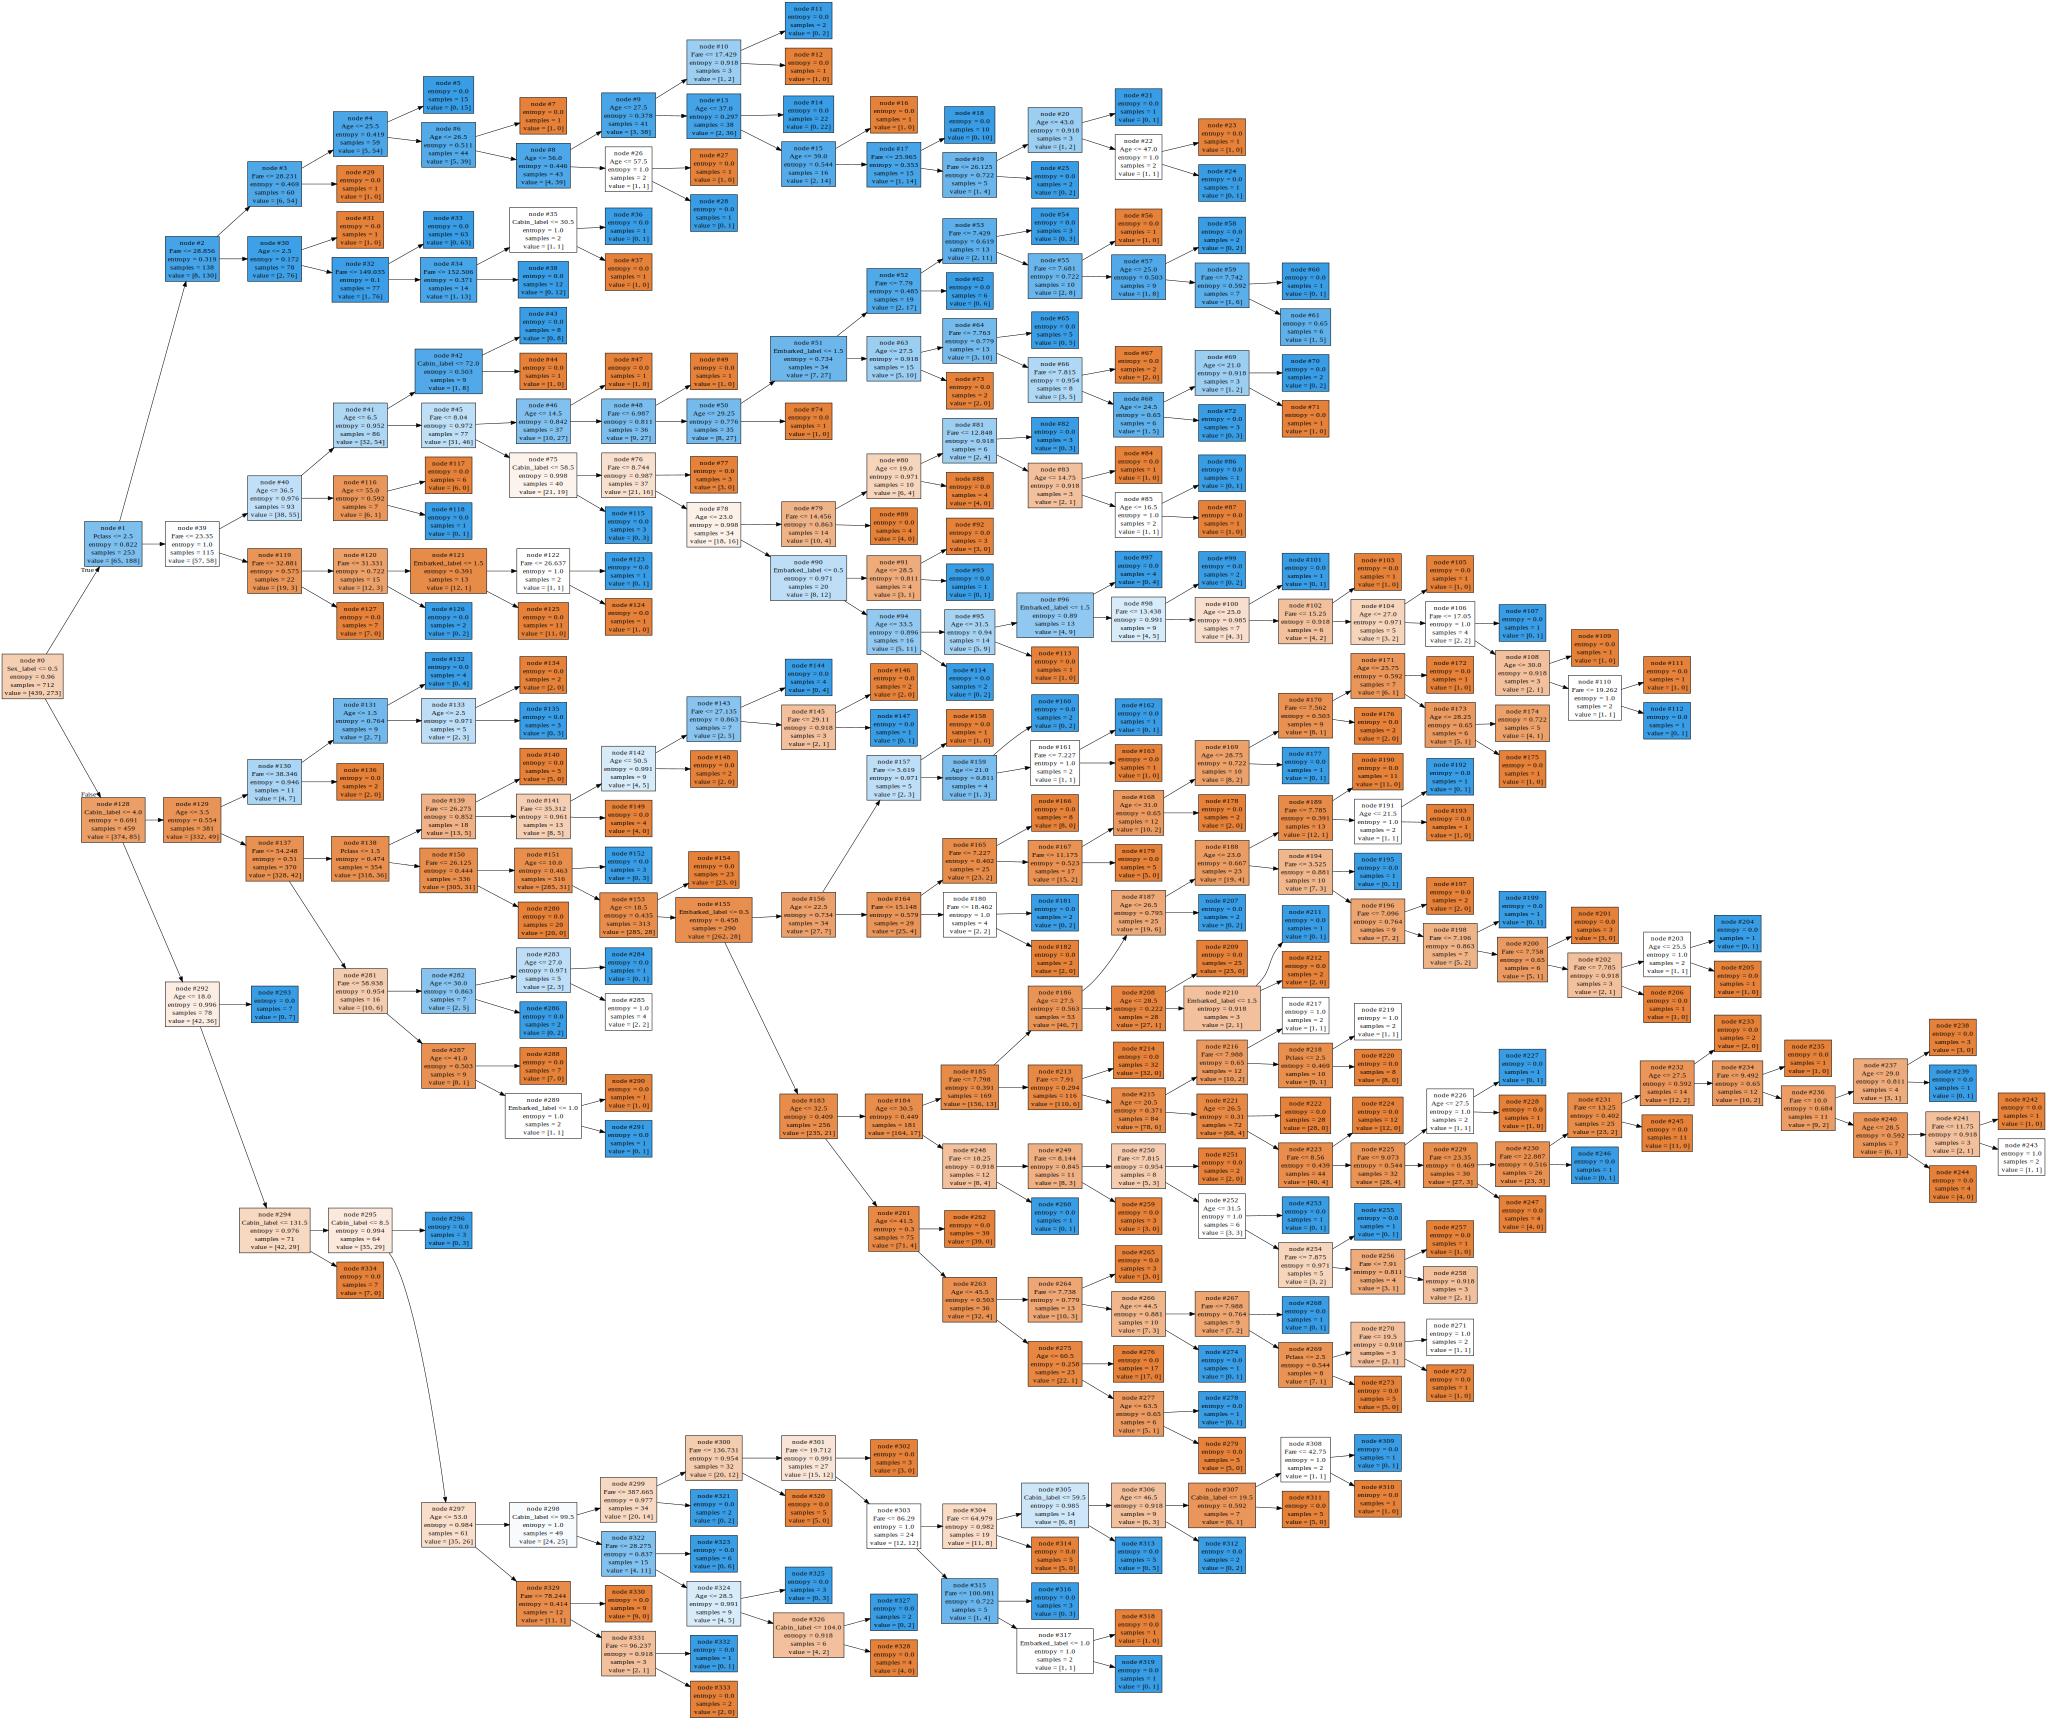

In [59]:
dts.show_decision_tree_structure()

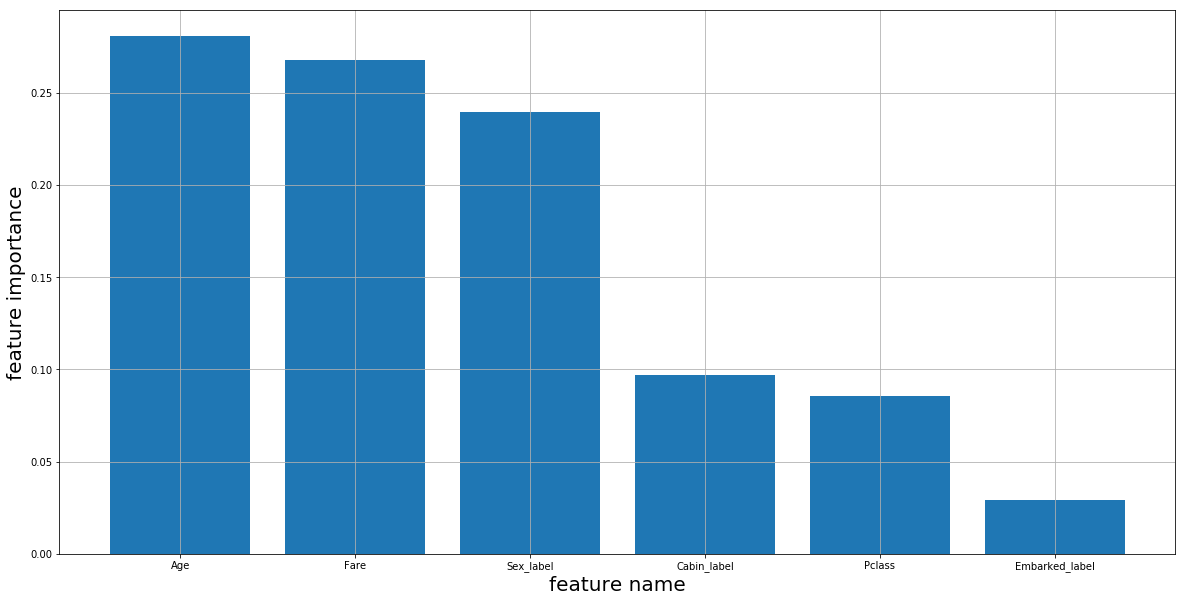

In [36]:
dts.show_features_importance()

#### Leaves impurity distribution

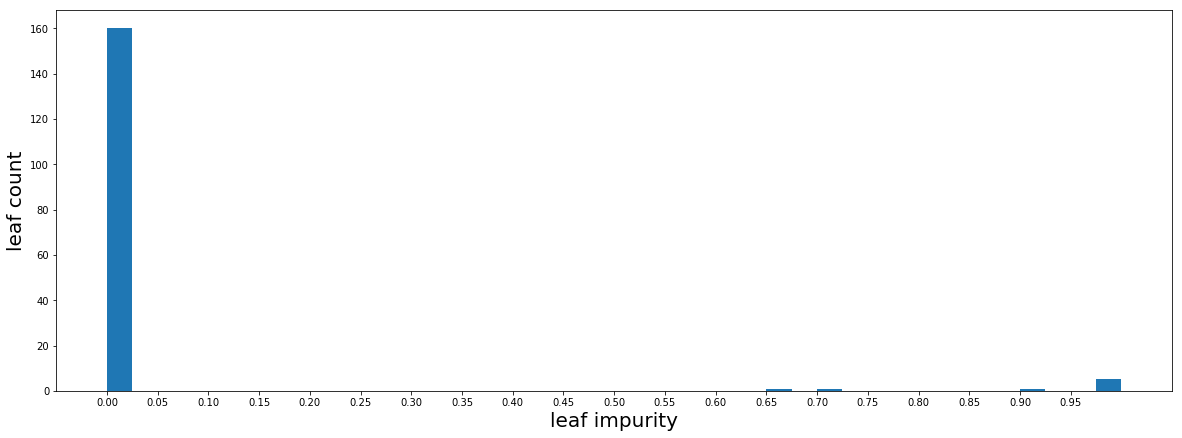

In [37]:
dts.show_leaf_impurity_distribution(bins = 40, figsize=(20,7))

#### Leaves sample distribution

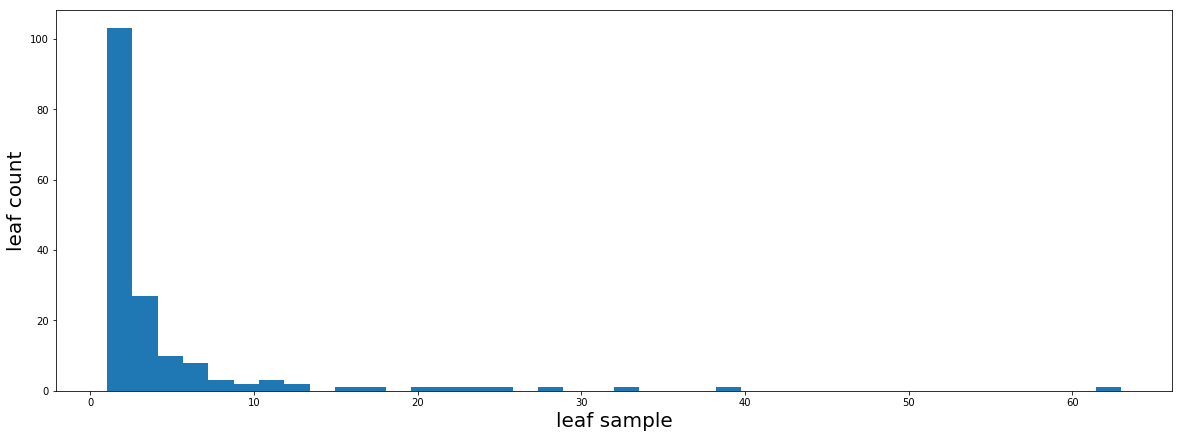

In [38]:
dts.show_leaf_samples_distribution(bins=40, figsize=(20,7))

#### Leaves stats

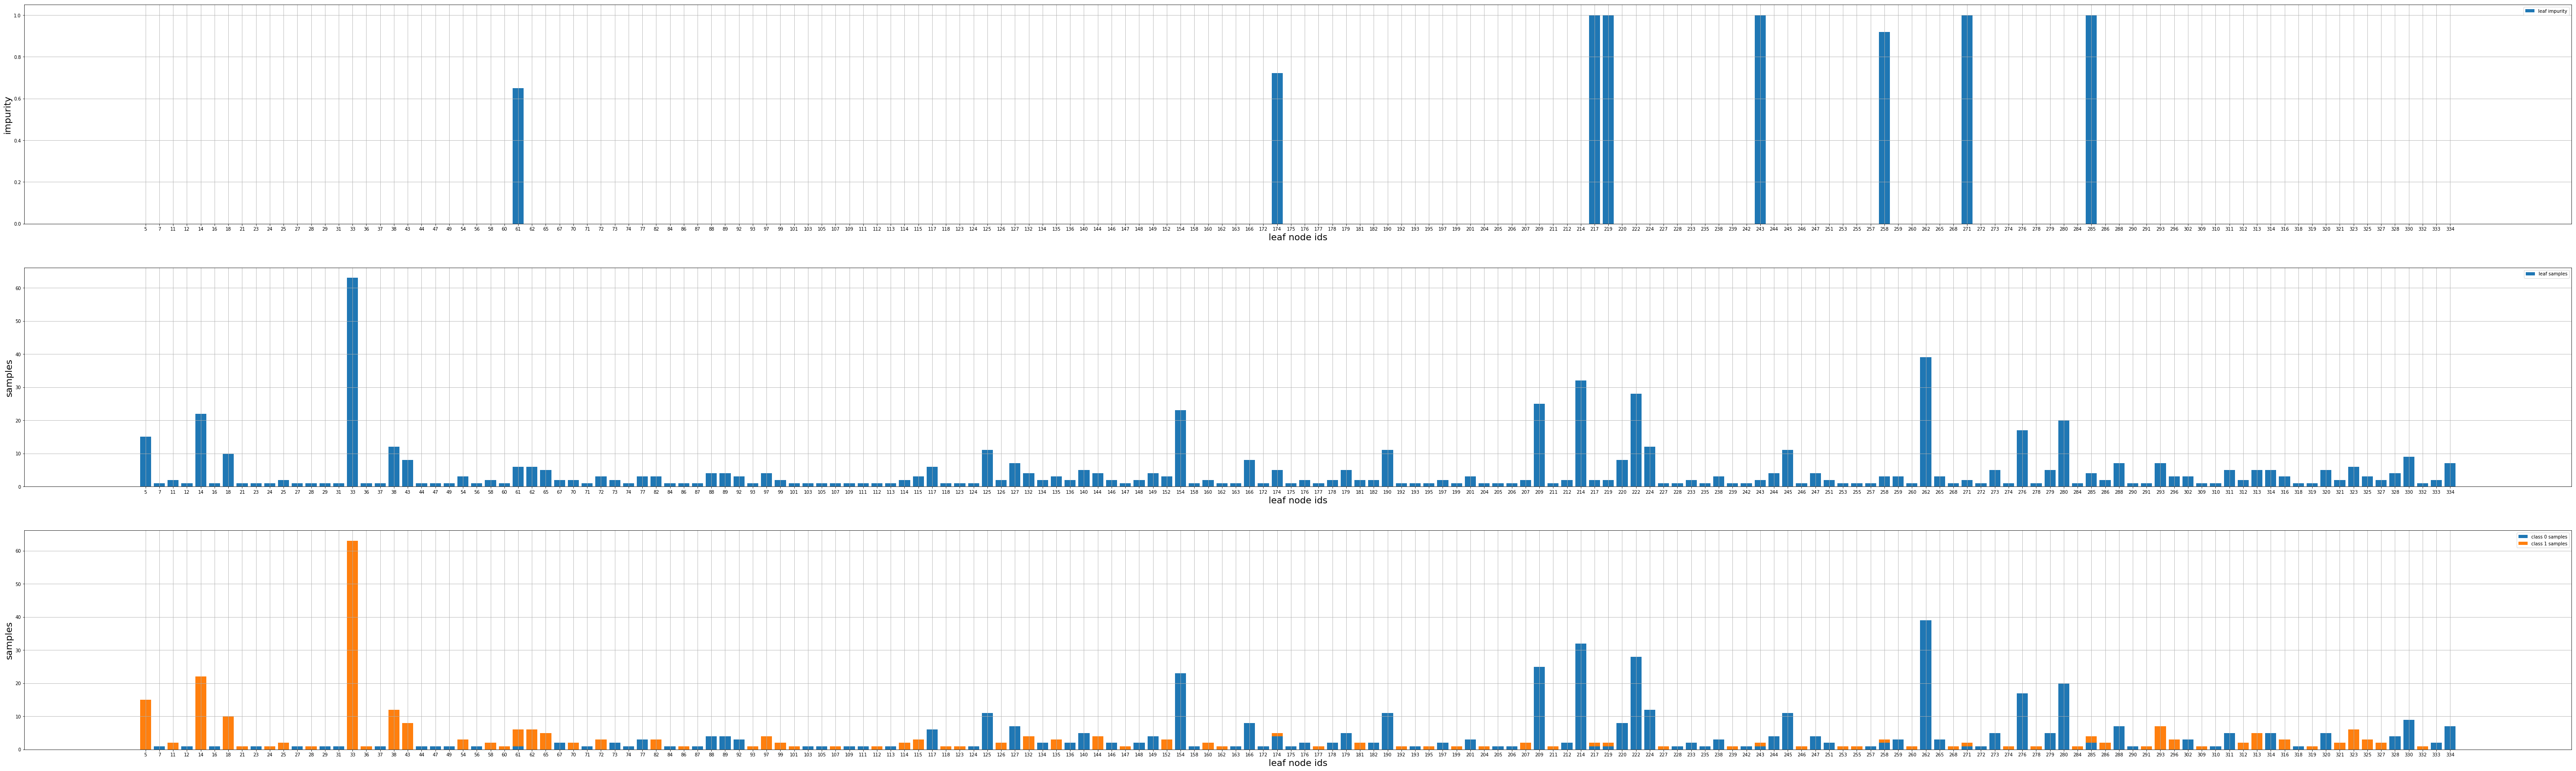

In [39]:
plt.figure(figsize=(100,30))
plt.subplot(3,1,1)
dts.show_leaf_impurity()

plt.subplot(3,1,2)
dts.show_leaf_samples()

plt.subplot(3,1,3)
dts.show_leaf_samples_by_class()

##### Investigate leaf impurity > 0

In [41]:
# Investigate leaf impurity
dts.get_node_samples(node_id=174)[features + [target]]

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label,Survived
87,3,28.0,7.2292,1,-1,0,0
307,3,28.0,7.2292,1,-1,0,0
341,3,28.0,7.2292,1,-1,0,0
493,3,28.0,7.2292,1,-1,0,1
509,3,28.0,7.2292,1,-1,0,0


##### Investigate leaf samples


In [44]:
dts.get_node_samples(node_id=262)[features + [target]]

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label,Survived
2,3,36.0,0.0000,1,-1,2,0
11,2,35.0,10.5000,1,-1,2,0
35,3,40.5,7.7500,1,-1,1,0
41,3,34.0,8.0500,1,-1,2,0
50,3,34.0,8.0500,1,-1,2,0
64,2,36.0,13.0000,1,-1,2,0
76,3,35.0,7.0500,1,-1,2,0
77,3,33.0,9.5000,1,-1,2,0
97,3,33.0,20.5250,1,-1,2,0
110,2,39.0,13.0000,1,-1,2,0


In [481]:
train["Fare"].mean()

32.19929691011236

In [45]:
dts.get_node_samples(node_id=262)[features + [target]].describe()

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label,Survived
count,39.000000,39.000000,39.000000,39.0,39.0,39.000000,39.0
mean,2.692308,36.230769,12.911000,1.0,-1.0,1.948718,0.0
std,0.467572,2.494326,6.863943,0.0,0.0,0.223456,0.0
min,2.000000,33.000000,0.000000,1.0,-1.0,1.000000,0.0
25%,2.000000,34.000000,7.895800,1.0,-1.0,2.000000,0.0
50%,3.000000,36.000000,10.500000,1.0,-1.0,2.000000,0.0
75%,3.000000,38.500000,15.525000,1.0,-1.0,2.000000,0.0
max,3.000000,41.000000,26.000000,1.0,-1.0,2.000000,0.0


### max_depth=5

In [46]:
model2 = DecisionTreeClassifier(criterion="entropy", random_state=random_state, max_depth=5)
model2.fit(train[features], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1987,
            splitter='best')

#### Model scores

In [49]:
save_decision_tree_structure(model2, f"dtree_rander_{max_depth}", features)

In [50]:
print_scores(model2, train, valid, features, target)

train accuracy 0.851123595505618
valid accuracy 0.8156424581005587


In [51]:
dts2 = DecisionTreeStructure(model2, train, features, target)

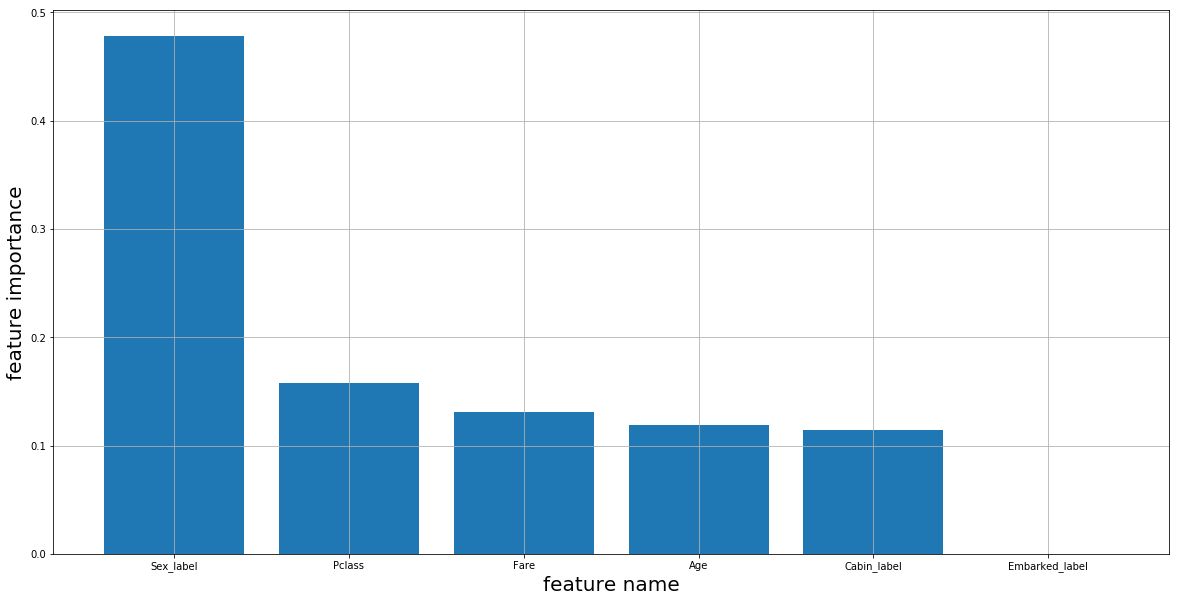

In [52]:
dts2.show_features_importance()

#### Leaves impurity distribution

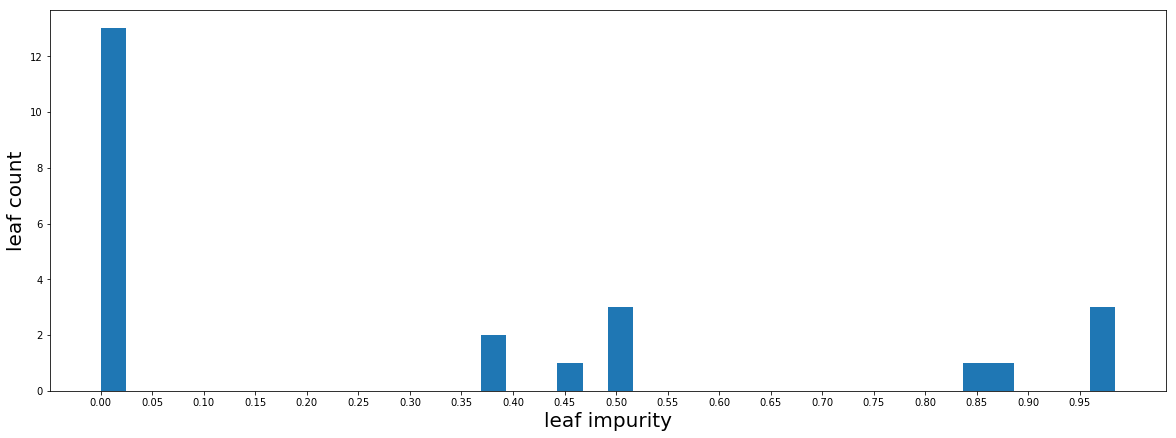

In [53]:
dts2.show_leaf_impurity_distribution(figsize=(20,7), bins=40)

#### Leaves sample distribution

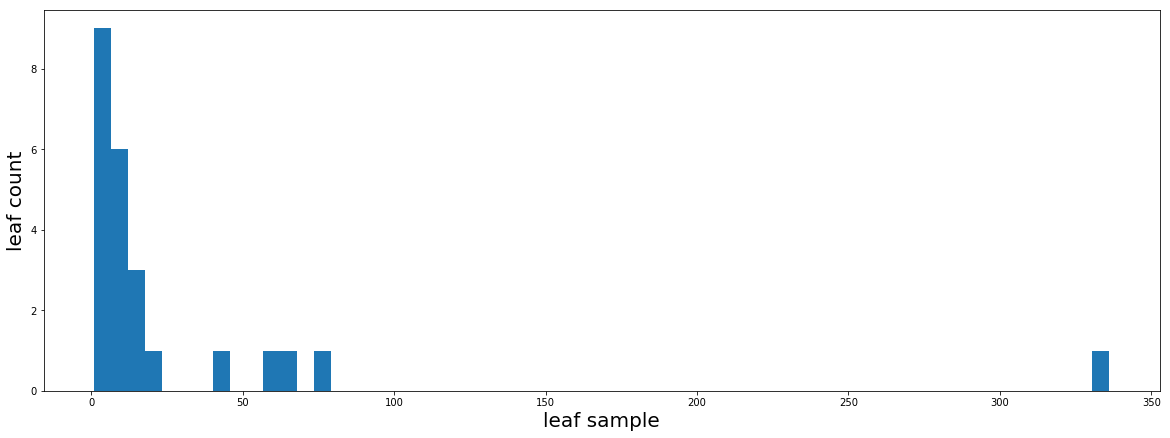

In [54]:
dts2.show_leaf_samples_distribution(figsize=(20, 7), bins=60)

#### Leaves stats

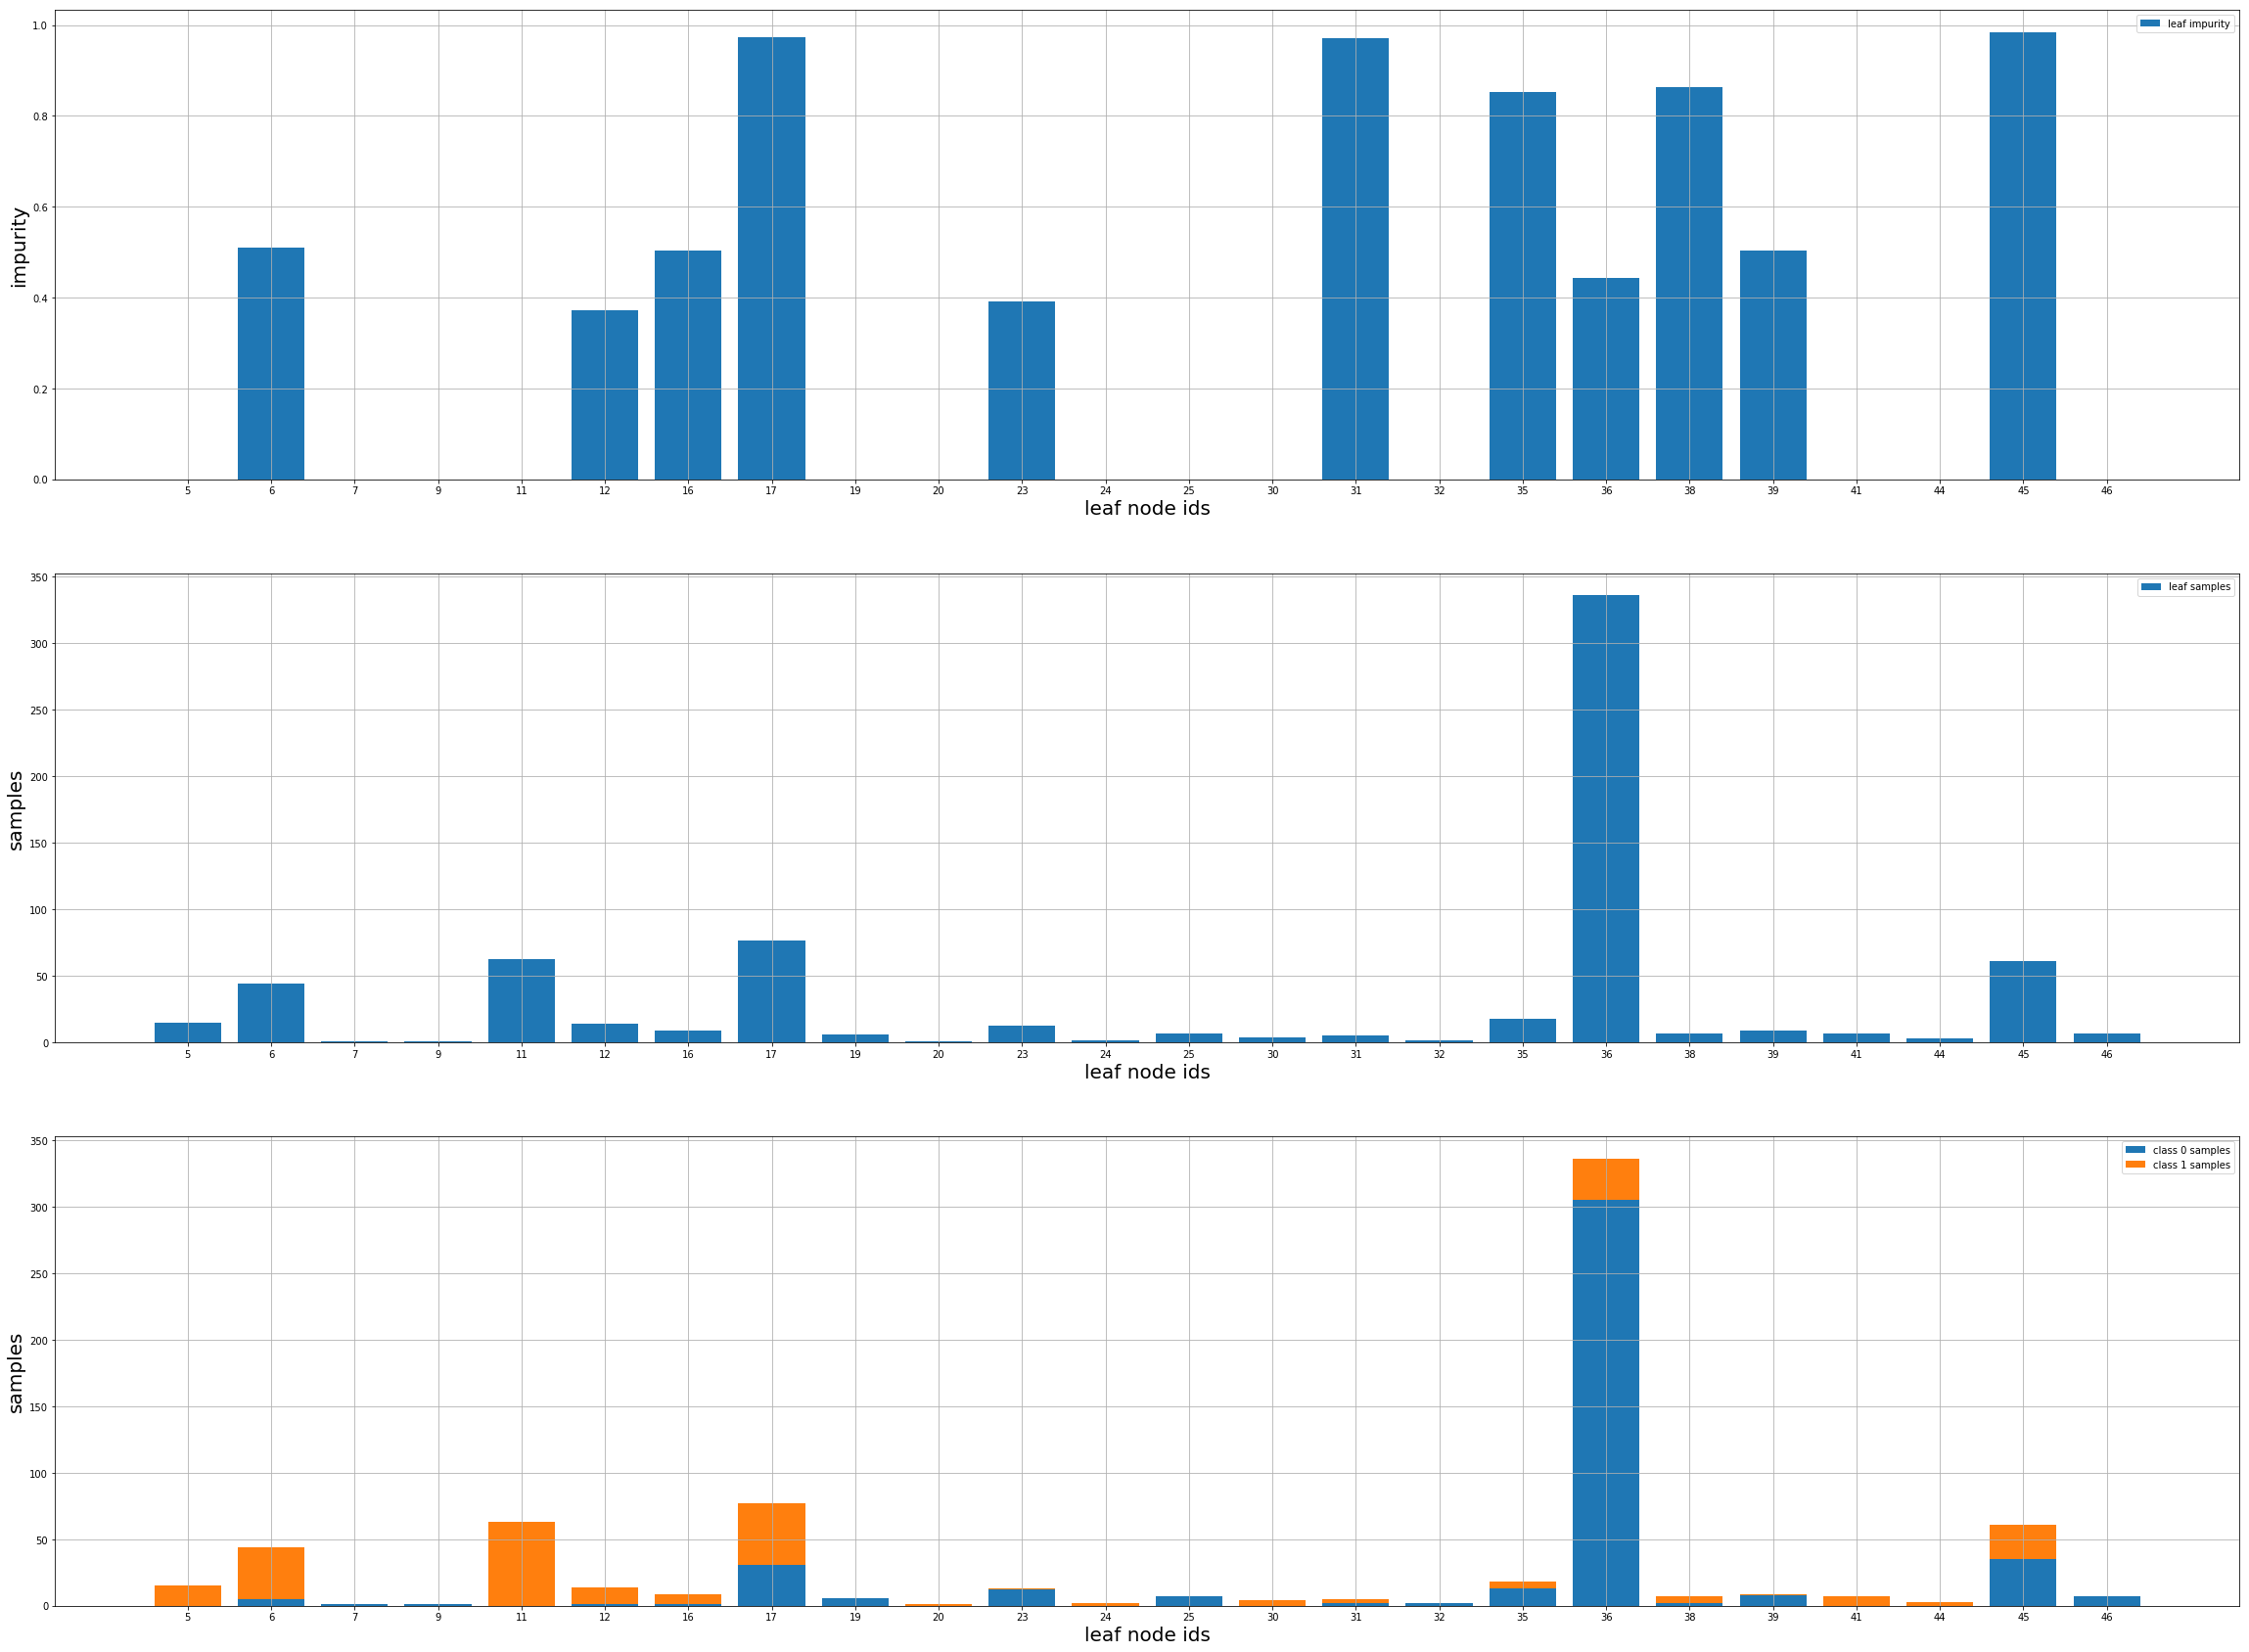

In [55]:
plt.figure(figsize=(40,30))
plt.subplot(3,1,1)
dts2.show_leaf_impurity()

plt.subplot(3,1,2)
dts2.show_leaf_samples()

plt.subplot(3,1,3)
dts2.show_leaf_samples_by_class()

#### Investigate predictions

In [57]:
sample = valid[features].iloc[randint(0, len(valid))]
sample

Pclass             2.00
Age                0.67
Fare              14.50
Sex_label          1.00
Cabin_label       -1.00
Embarked_label     2.00
Name: 755, dtype: float64

In [528]:
model2.predict([sample])

array([0])

INFO - Make a prediction for sample Pclass             2.00
Age                0.67
Fare              14.50
Sex_label          1.00
Cabin_label       -1.00
Embarked_label     2.00
Name: 755, dtype: float64
INFO - decision path [ 0 26 27 28 29 30]


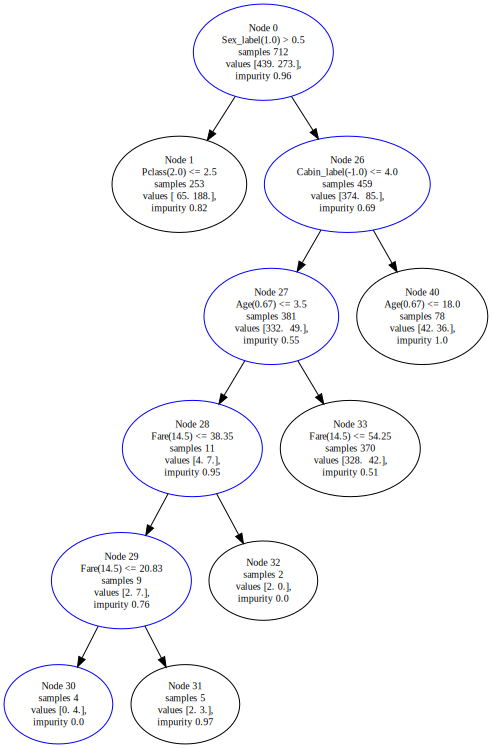

In [58]:
dts2.show_decision_tree_prediction_path(sample)

[('Pclass', 1.0), ('Age', 60.0), ('Fare', 75.25), ('Sex_label', 0.0), ('Cabin_label', 104.0), ('Embarked_label', 0.0)]

Node 0, Sex_label(0.0) <= 0.5, sample size 712 (439/273), impurity 0.96 


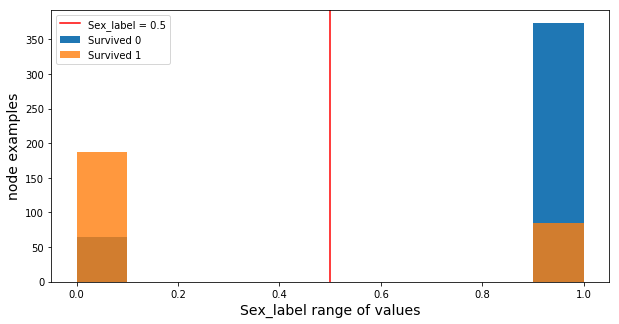

Node 1, Pclass(1.0) <= 2.5, sample size 253 (65/188), impurity 0.82 


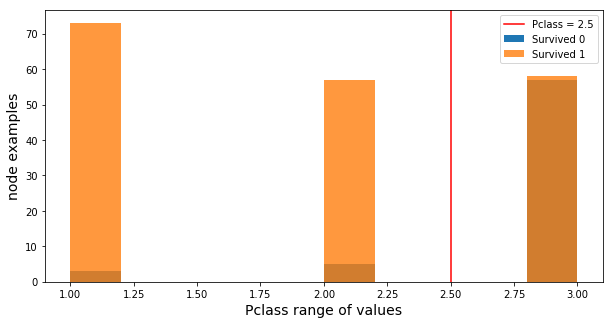

Node 2, Fare(75.25) > 28.856249809265137, sample size 138 (8/130), impurity 0.32 


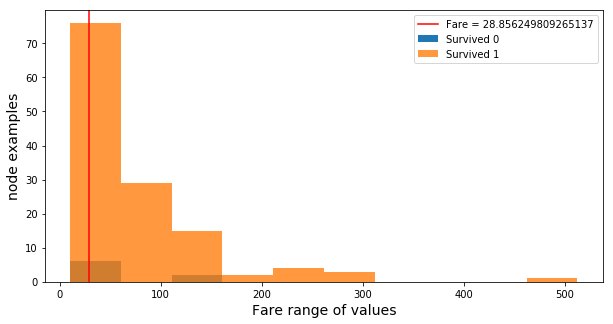

Node 8, Age(60.0) > 2.5, sample size 78 (2/76), impurity 0.17 


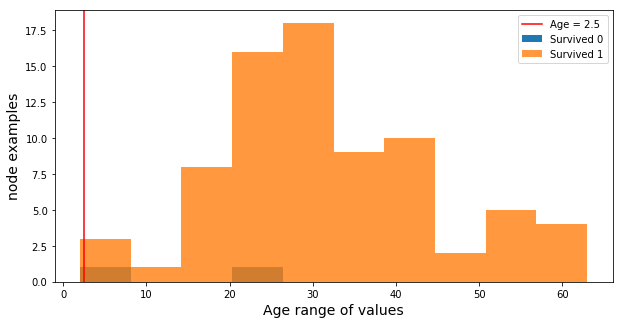

Node 10, Fare(75.25) <= 149.035400390625, sample size 77 (1/76), impurity 0.1 


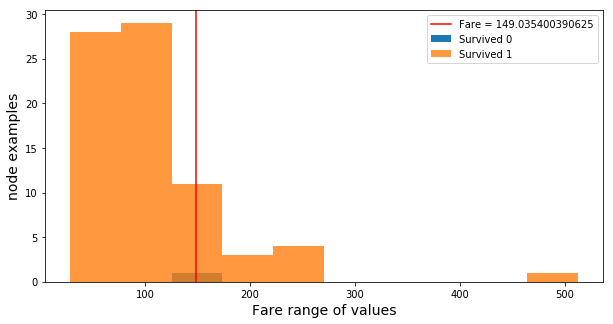

Node 11, sample size 63 (0/63), impurity 0.0 


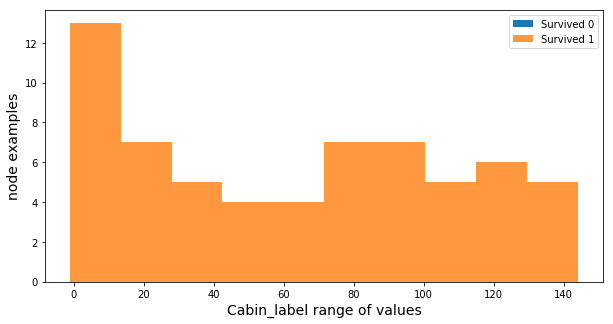

In [500]:
dts2.show_decision_tree_splits_prediction(sample)

### min_sample_split = 20

In [428]:
model3 = DecisionTreeClassifier(criterion="entropy", random_state=random_state, min_samples_split=20)
model3.fit(train[features], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1987,
            splitter='best')

#### Init decision tree structure

In [429]:
dts3 = DecisionTreeStructure(model3, train, features, target)

#### Model scores

In [430]:
print_scores(model3, train, valid, features, target)

train accuracy 0.8876404494382022
valid accuracy 0.8044692737430168


In [431]:
train.shape

(712, 16)

#### Feature importance

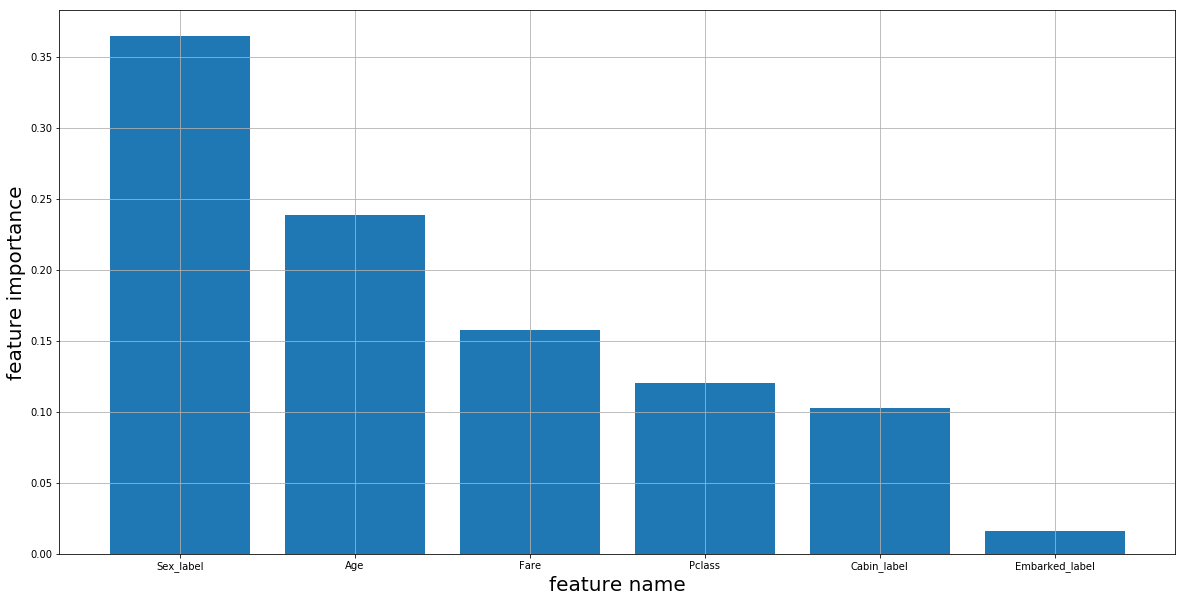

In [432]:
dts3.show_features_importance()

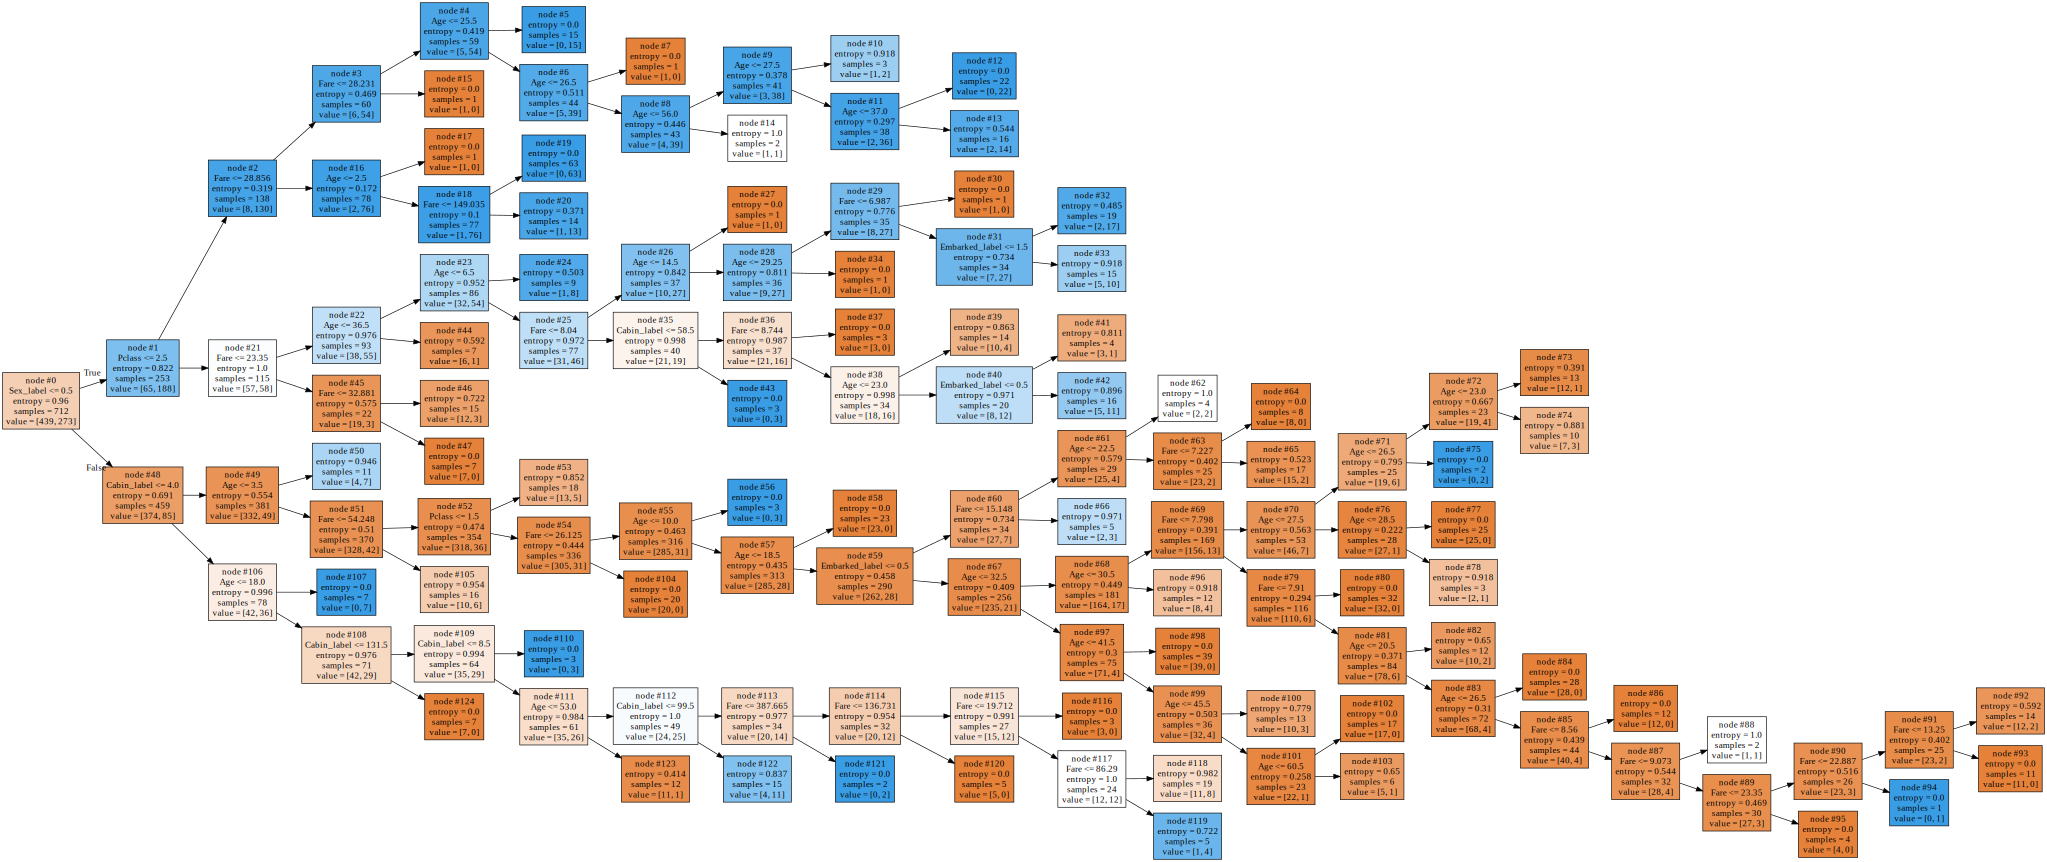

In [433]:
dts3.show_decision_tree_structure()

#### Leaves impurity distribution

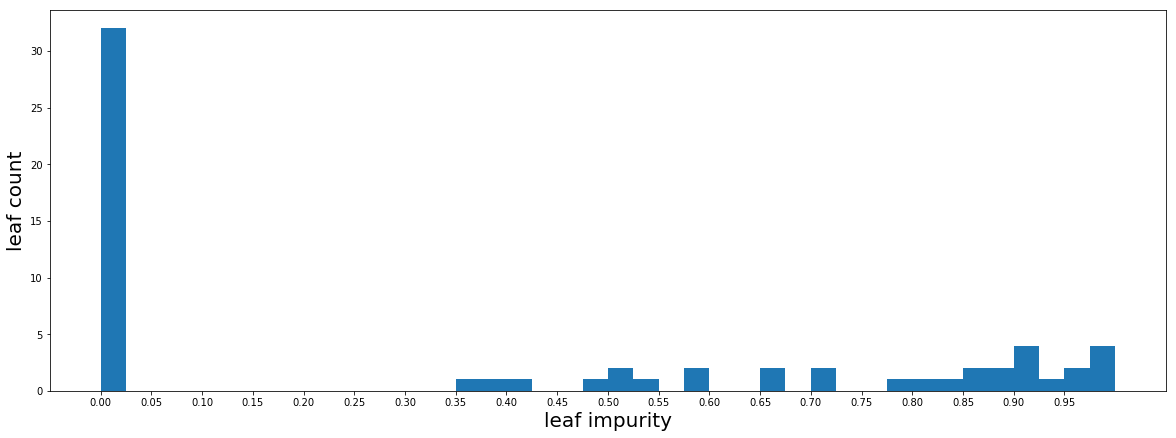

In [434]:
dts3.show_leaf_impurity_distribution(bins=40, figsize=(20, 7))

#### Leaves sample distribution

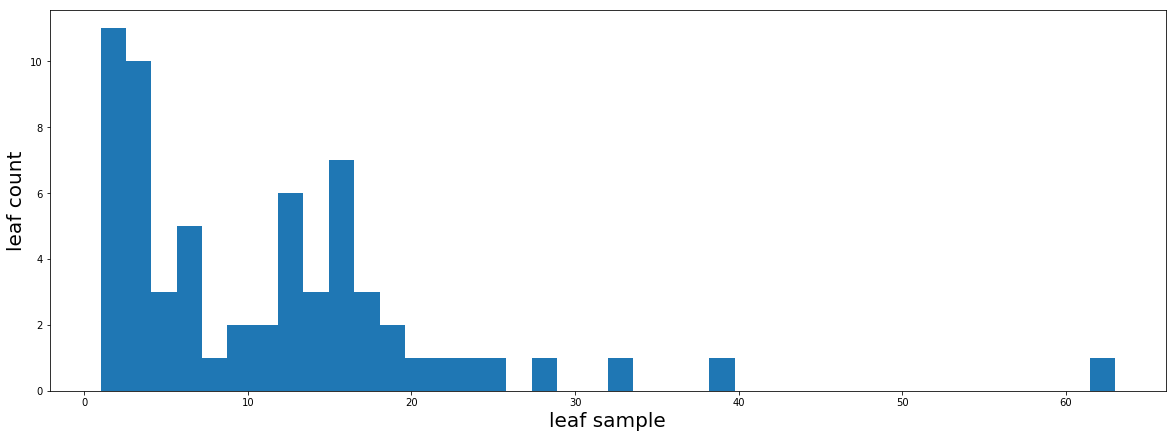

In [435]:
dts3.show_leaf_samples_distribution(bins=40, figsize=(20, 7))

#### Leaves stats

In [367]:
dts3.get_leaf_node_count()

63

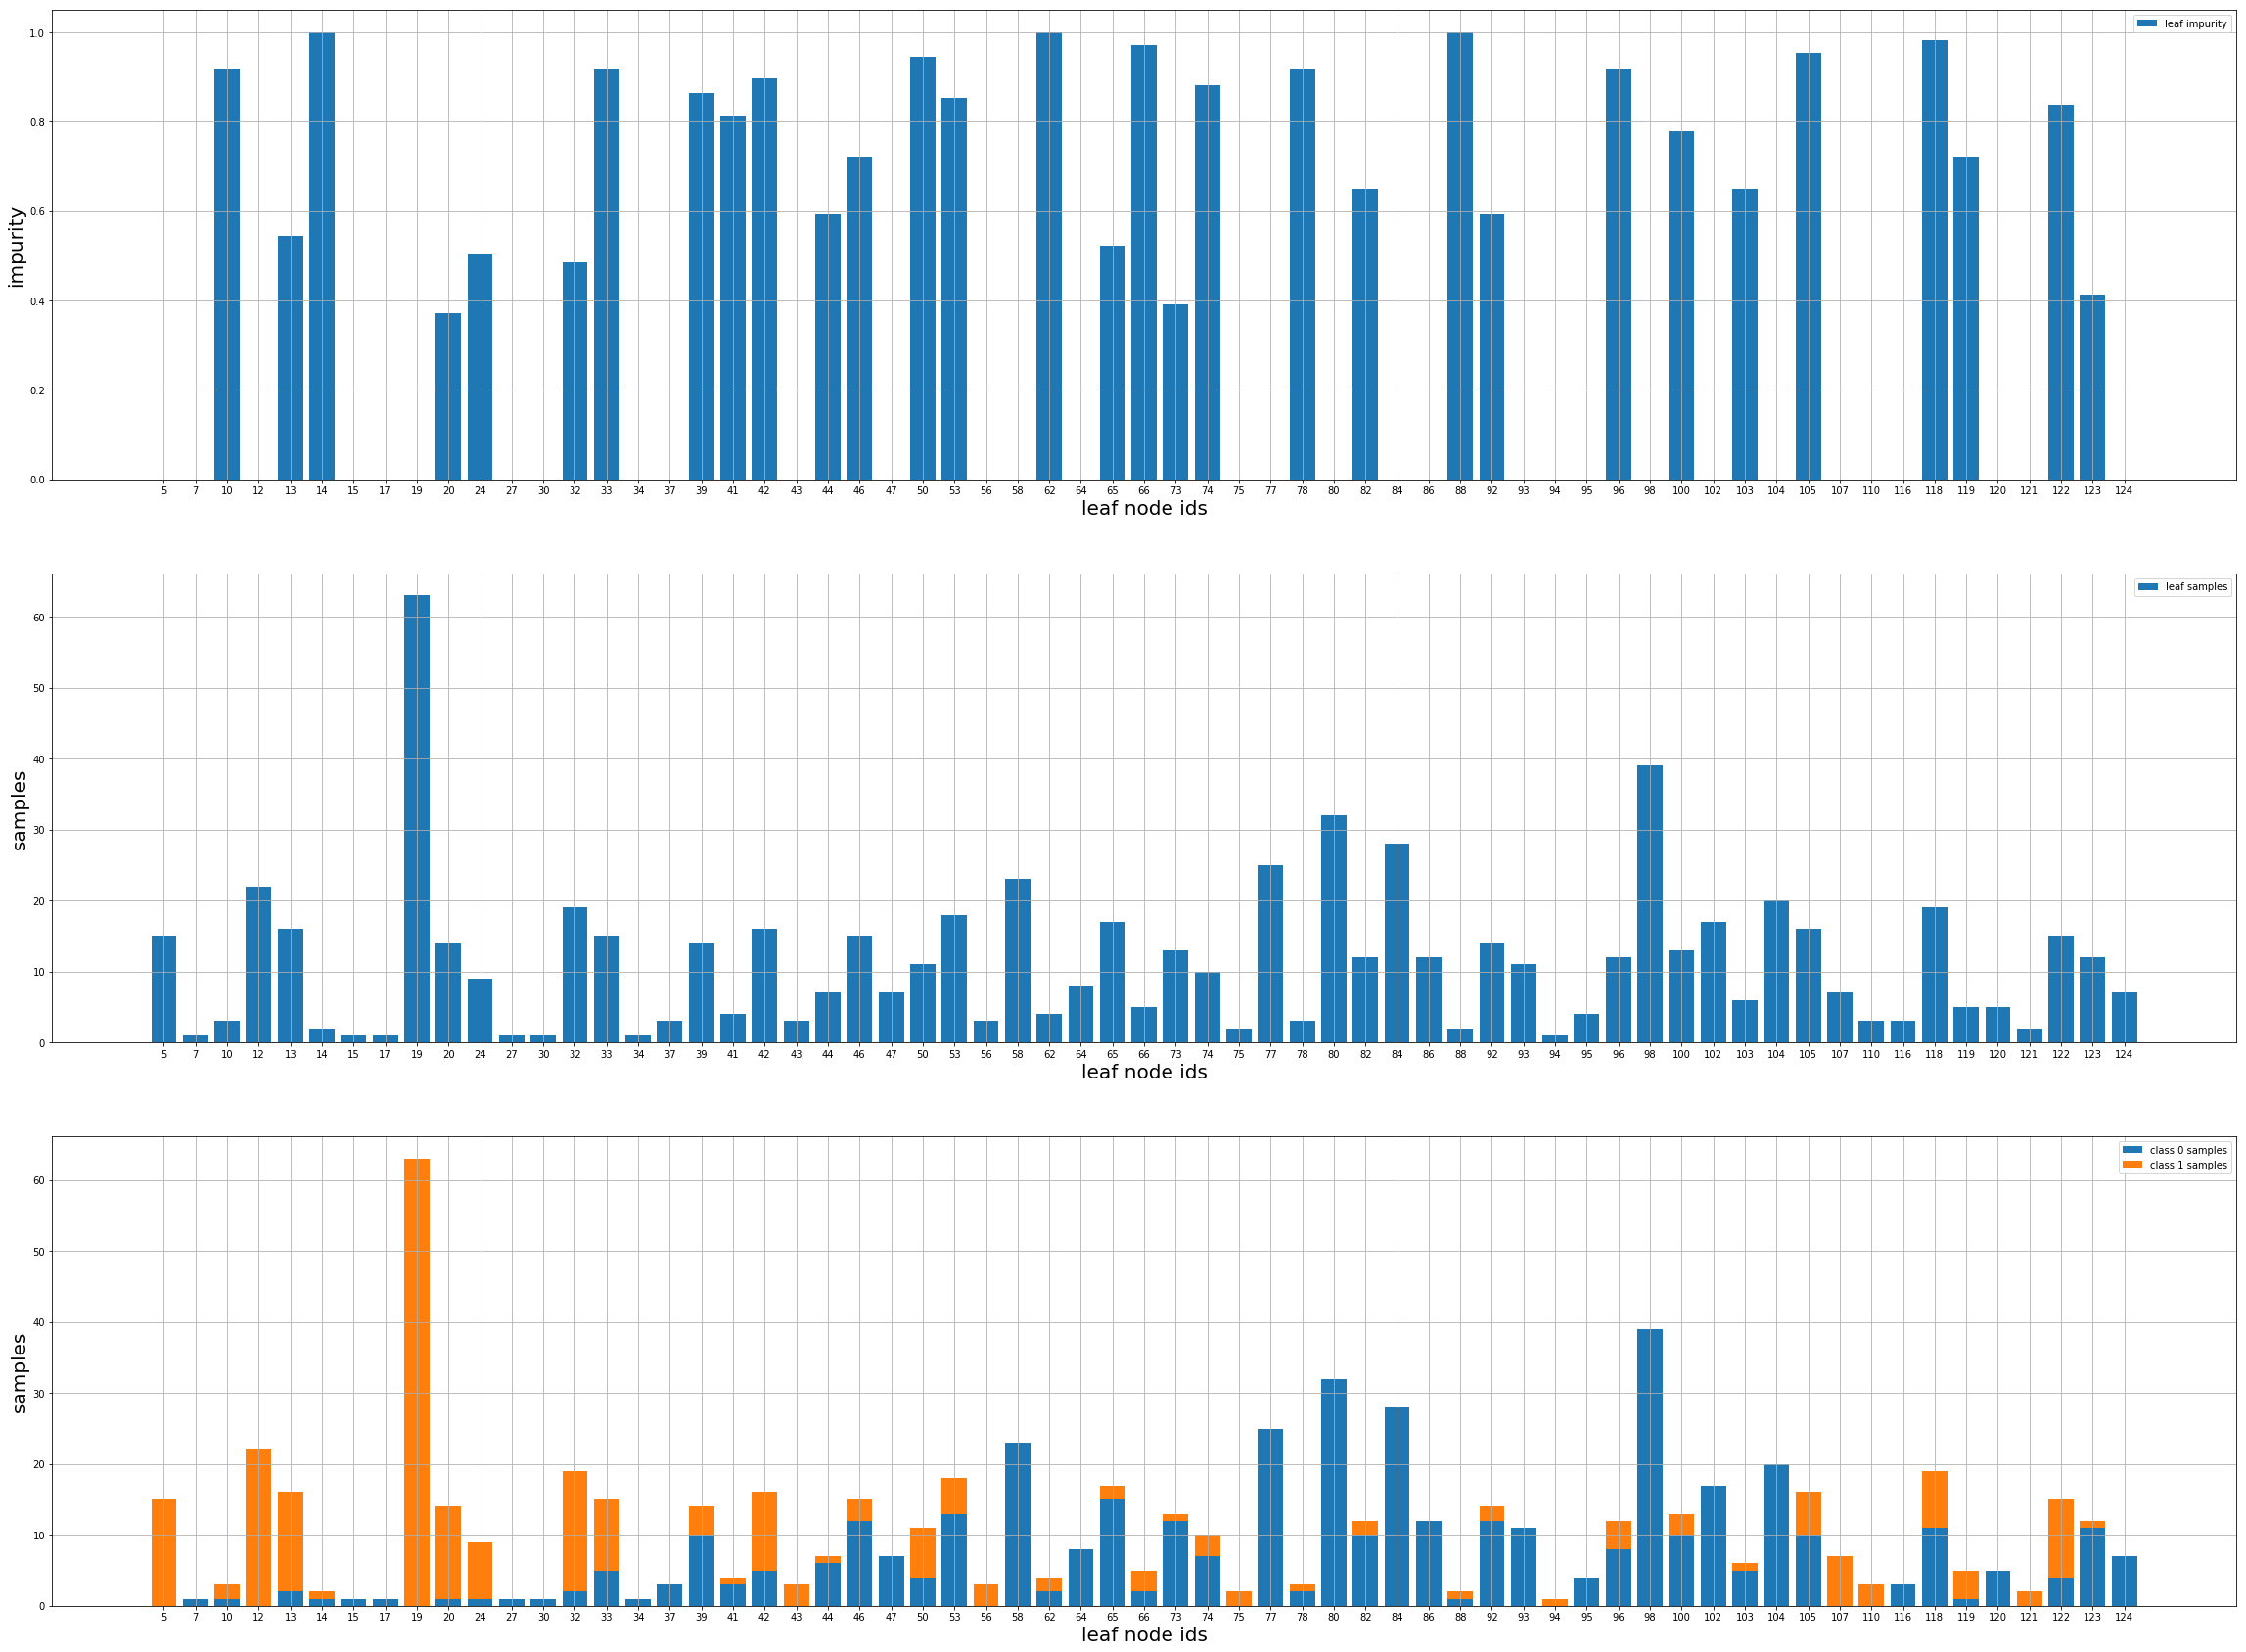

In [369]:
plt.figure(figsize=(40,30))
plt.subplot(3,1,1)
dts3.show_leaf_impurity()

plt.subplot(3,1,2)
dts3.show_leaf_samples()

plt.subplot(3,1,3)
dts3.show_leaf_samples_by_class()

In [382]:
dts3.get_node_samples(node_id=118).sort_values(by=["Survived"])[features + [target]]

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label,Survived
358,1,45.0,26.5500,1,26,2,0
570,1,29.0,66.6000,1,61,2,0
566,1,28.0,50.0000,1,9,2,0
550,1,28.0,35.0000,1,59,2,0
453,1,45.0,83.4750,1,80,2,0
396,1,37.0,53.1000,1,55,2,0
641,1,24.0,79.2000,1,45,0,0
237,1,46.0,79.2000,1,44,0,0
207,1,30.0,27.7500,1,53,0,0
197,1,21.0,77.2875,1,98,2,0


In [383]:
dts3.get_node_samples(node_id=118)[features + [target]].describe()

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label,Survived
count,19.0,19.000000,19.000000,19.0,19.000000,19.000000,19.000000
mean,1.0,32.894737,49.119516,1.0,55.263158,1.368421,0.421053
std,0.0,9.462762,20.357984,0.0,23.328195,0.955134,0.507257
min,1.0,21.000000,26.550000,1.0,9.000000,0.000000,0.000000
25%,1.0,28.000000,30.250000,1.0,44.500000,0.000000,0.000000
50%,1.0,28.000000,50.000000,1.0,58.000000,2.000000,0.000000
75%,1.0,41.000000,64.979150,1.0,69.500000,2.000000,1.000000
max,1.0,52.000000,83.475000,1.0,98.000000,2.000000,1.000000


In [320]:
sample = train[features].iloc[120]
print(sample)
print(f"predict class probability {model.predict_proba([sample])}")

Pclass             3.0
Age               28.0
Fare              15.5
Sex_label          0.0
Cabin_label       -1.0
Embarked_label     1.0
Name: 241, dtype: float64
predict class probability [[0. 1.]]


INFO - Make a prediction for sample Pclass             3.0
Age               28.0
Fare              15.5
Sex_label          0.0
Cabin_label       -1.0
Embarked_label     1.0
Name: 241, dtype: float64
INFO - decision path [ 0  1 39 40 41 45 75 76 78 90 94 95 96 97]


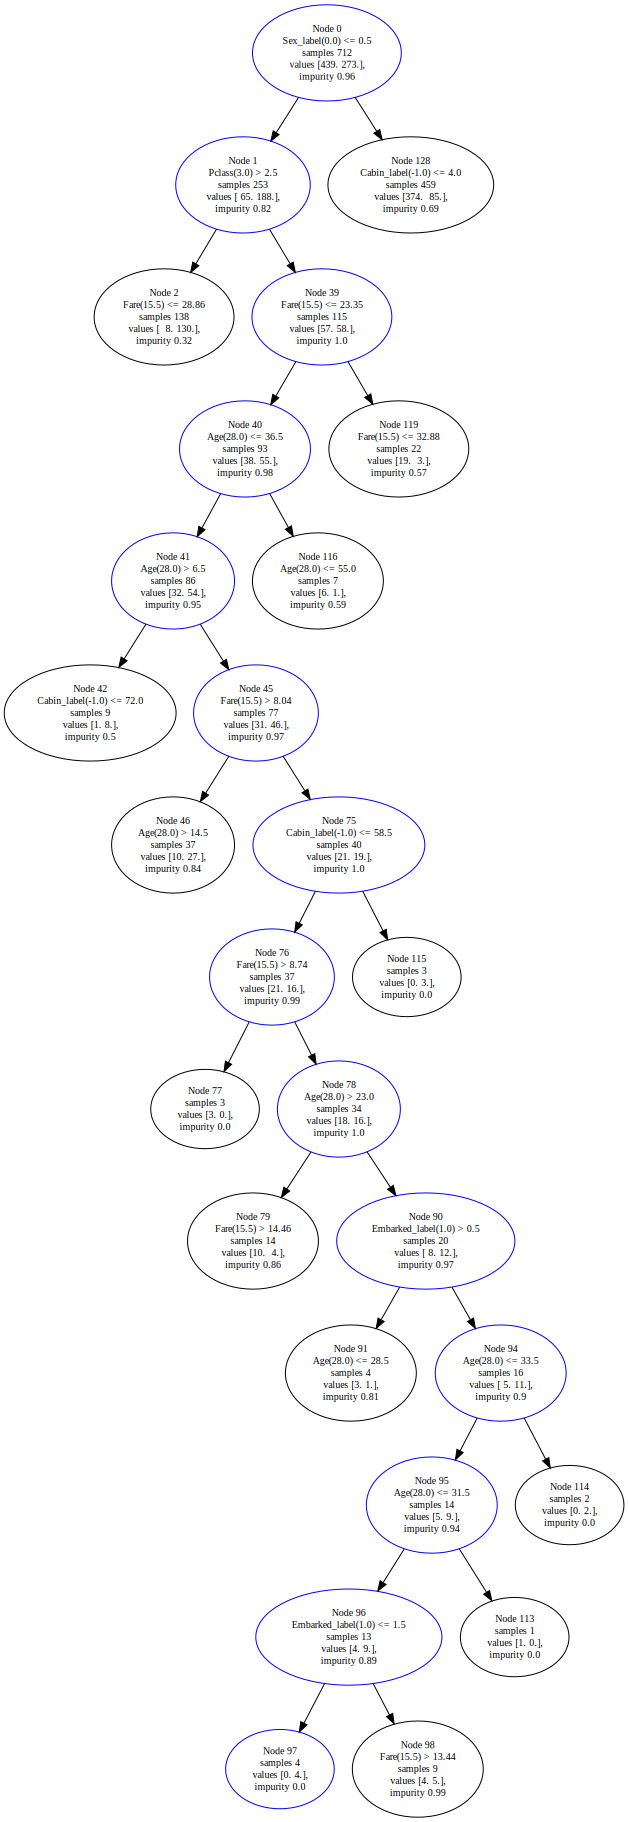

In [322]:
dts.show_decision_tree_prediction_path(sample)

[('Pclass', 3.0), ('Age', 28.0), ('Fare', 15.5), ('Sex_label', 0.0), ('Cabin_label', -1.0), ('Embarked_label', 1.0)]

Node 0, Sex_label(0.0) <= 0.5, sample size 712 (439/273), impurity 0.96 


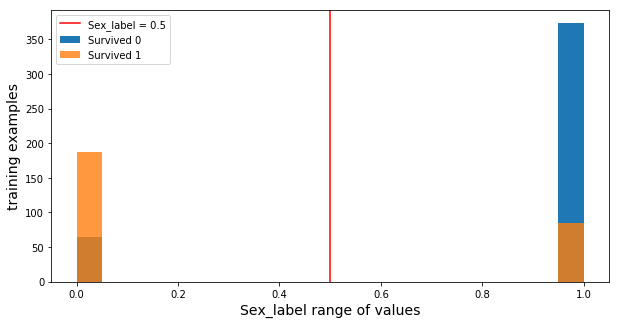

Node 1, Pclass(3.0) > 2.5, sample size 253 (65/188), impurity 0.82 


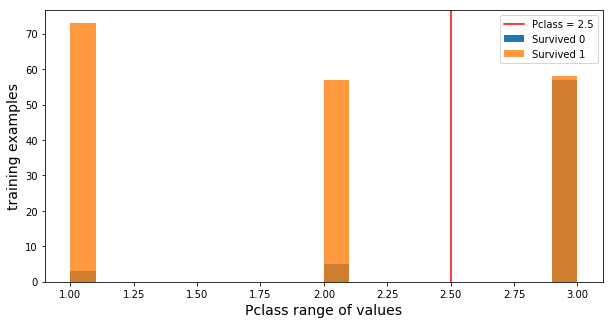

Node 39, Fare(15.5) <= 23.350000381469727, sample size 115 (57/58), impurity 1.0 


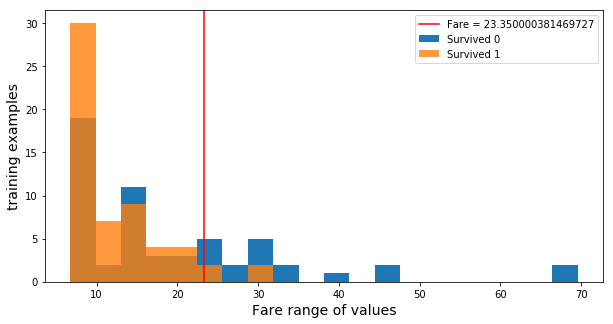

Node 40, Age(28.0) <= 36.5, sample size 93 (38/55), impurity 0.98 


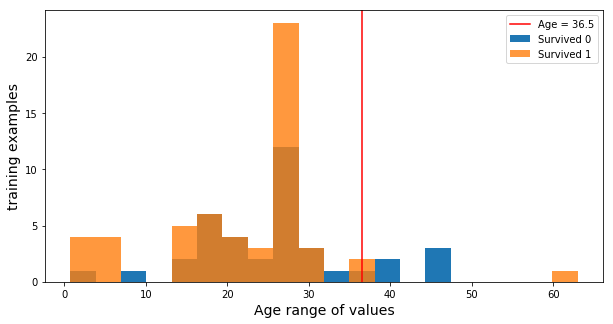

Node 41, Age(28.0) > 6.5, sample size 86 (32/54), impurity 0.95 


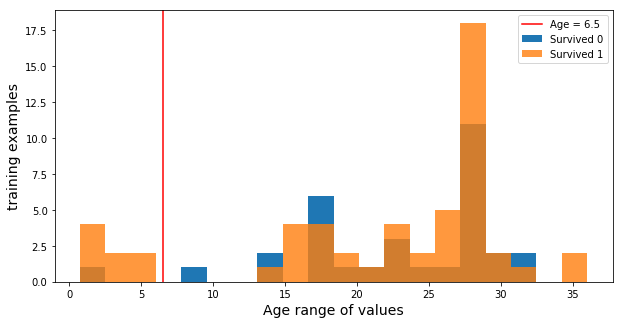

Node 45, Fare(15.5) > 8.039599895477295, sample size 77 (31/46), impurity 0.97 


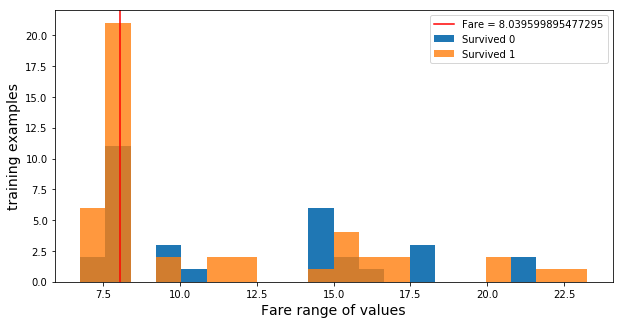

Node 75, Cabin_label(-1.0) <= 58.5, sample size 40 (21/19), impurity 1.0 


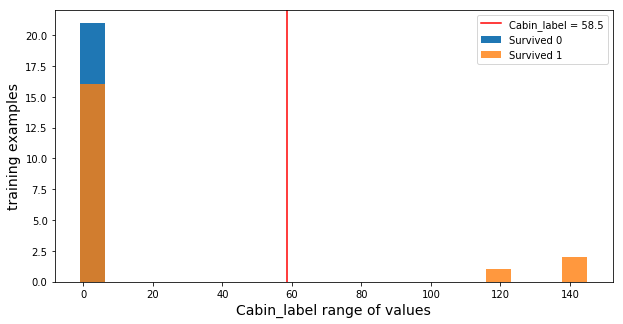

Node 76, Fare(15.5) > 8.743750095367432, sample size 37 (21/16), impurity 0.99 


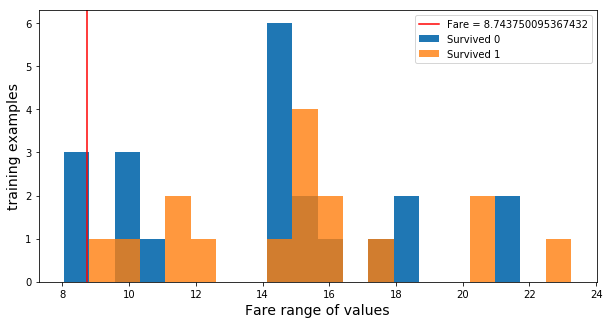

Node 78, Age(28.0) > 23.0, sample size 34 (18/16), impurity 1.0 


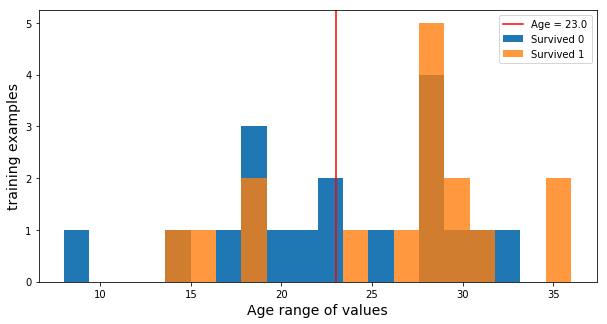

Node 90, Embarked_label(1.0) > 0.5, sample size 20 (8/12), impurity 0.97 


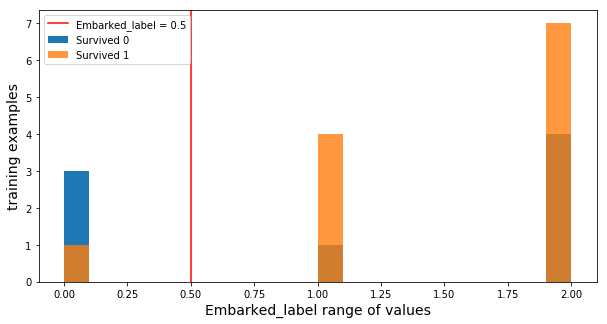

Node 94, Age(28.0) <= 33.5, sample size 16 (5/11), impurity 0.9 


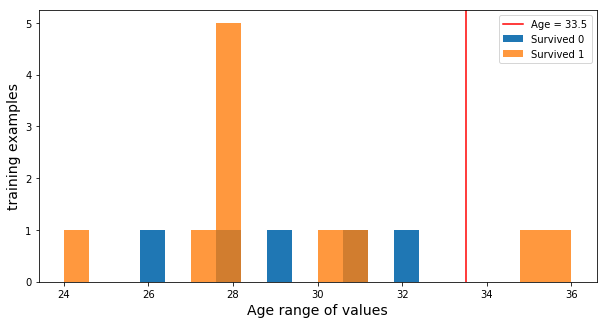

Node 95, Age(28.0) <= 31.5, sample size 14 (5/9), impurity 0.94 


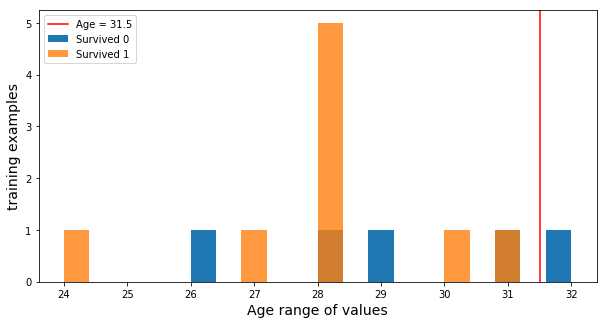

Node 96, Embarked_label(1.0) <= 1.5, sample size 13 (4/9), impurity 0.89 


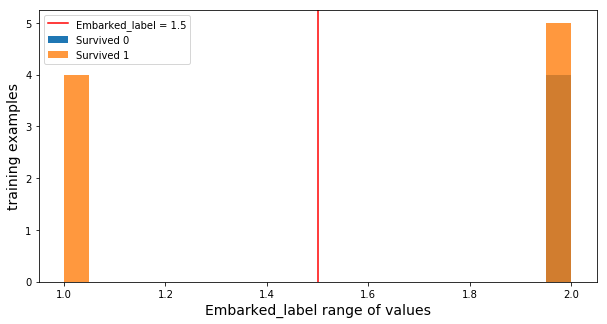

Node 97, sample size 4 (0/4), impurity 0.0 


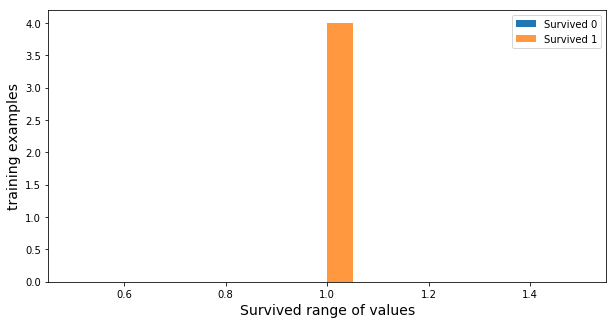

In [323]:
dts.show_decision_tree_splits_prediction(sample, bins=20)

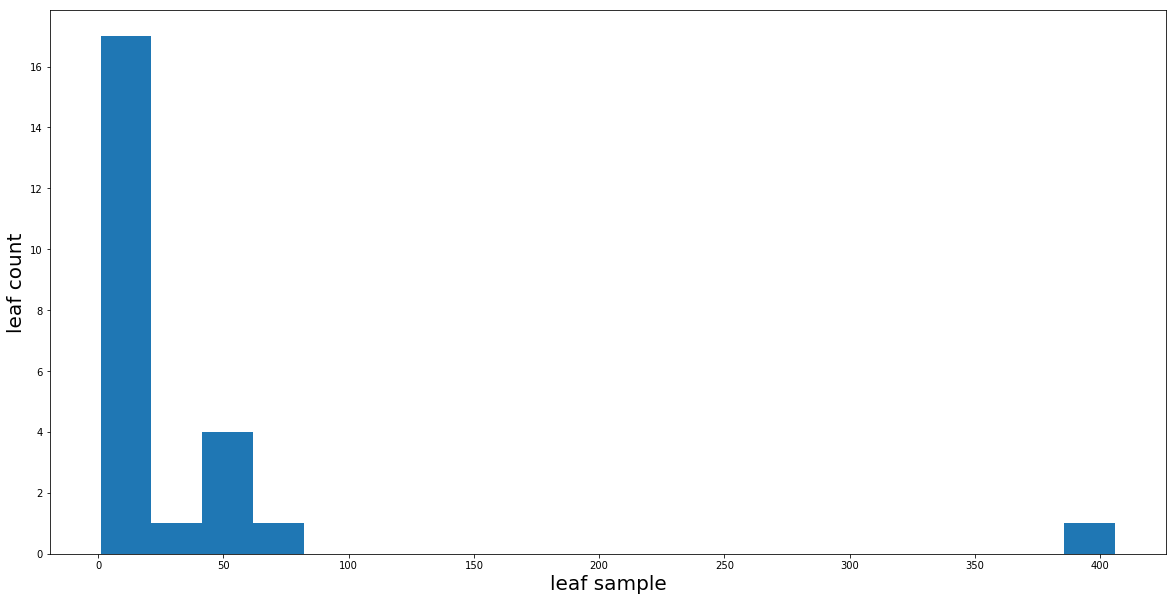

In [69]:
dts.show_leaf_samples_distribution(figsize=(20, 10), bins=20)

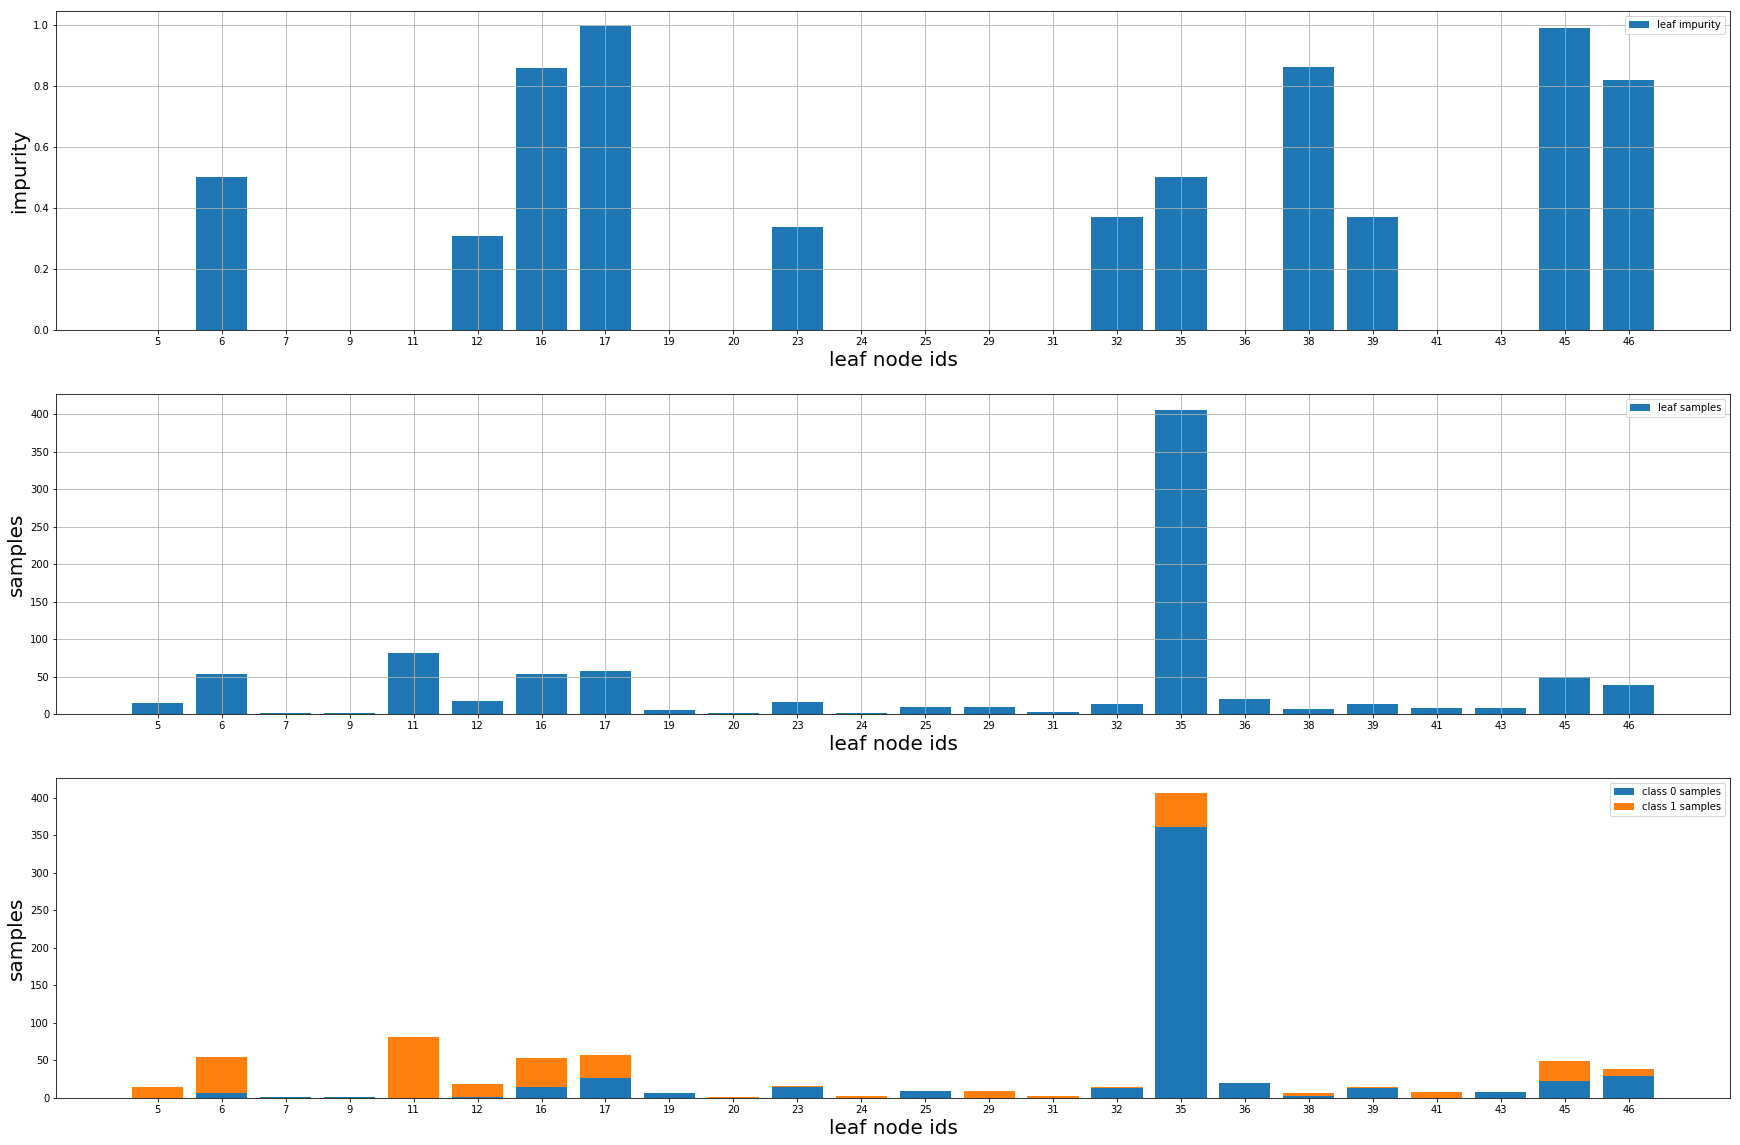

In [70]:
plt.figure(figsize=(30,20))
plt.subplot(3,1,1)
dts.show_leaf_impurity()

plt.subplot(3,1,2)
dts.show_leaf_samples()

plt.subplot(3,1,3)
dts.show_leaf_samples_by_class()
